In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


# Load the dataset
df = pd.read_csv(r'C:\Users\allib\OneDrive\Desktop\MS Data Science\ANA500\vgsales.csv')


# Display basic info about the dataset
df_info = df.info()
df_head = df.head()

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Display initial dataset information
df_info, df_head, missing_values, summary_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


(None,
    Rank                      Name Platform    Year         Genre Publisher  \
 0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
 1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
 2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
 3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
 4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
 0     41.49     29.02      3.77         8.46         82.74  
 1     29.08      3.58      6.81         0.77         40.24  
 2     15.85     12.88      3.79         3.31         35.82  
 3     15.75     11.01      3.28         2.96         33.00  
 4     11.27      8.89     10.22         1.00         31.37  ,
 Rank              0
 Name              0
 Platform          0
 Year            271
 Genre             0
 Publisher        58
 NA_Sales         

In [6]:
#missing values

#Count missing values in each column
missing_values = df.isnull().sum()

#Combine both missing and zero value counts into a summary table
missing_zero_summary = pd.DataFrame({
    "Missing Values": missing_values})

print(missing_zero_summary)

              Missing Values
Rank                       0
Name                       0
Platform                   0
Year                     271
Genre                      0
Publisher                 58
NA_Sales                   0
EU_Sales                   0
JP_Sales                   0
Other_Sales                0
Global_Sales               0


In [8]:
#drop rows where 'Year' or 'Publisher' columns have missing values
df_cleaned = df.dropna(subset=['Year', 'Publisher'])

#count the number of records after cleaning
num_records_after_cleaning = df_cleaned.shape[0]

#display the updated record count
print(f"Number of records after dropping missing values: {num_records_after_cleaning}")


Number of records after dropping missing values: 16291


In [10]:
df_cleaned.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
#overview of my data

#Show target variable
target_variable = "Global_Sales"

#number of columns
num_columns = df.shape[1]

#Checking the data distribution
data_distribution = df_cleaned.describe()

#Minimum and Maximum values for Global Sales by region
min_max_sales_by_region = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].agg(['min', 'max'])

#Sales distribution by region
sales_distribution_by_region = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].describe()

# Display results
print(f"Number of Columns: {num_columns}")
print(f"Target Variable: {target_variable}")
print("\nData Distribution:\n", data_distribution)
print("\nMin & Max Sales by Region:\n", min_max_sales_by_region)
print("\nSales Distribution by Region:\n", sales_distribution_by_region)


Number of Columns: 11
Target Variable: Global_Sales

Data Distribution:
                Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  

In [14]:
df_cleaned.duplicated().sum()

0

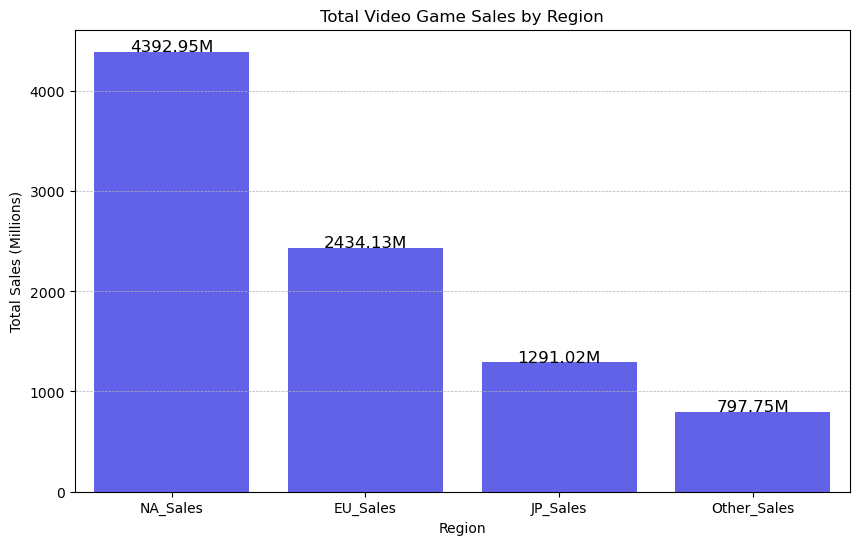

In [18]:
# aggregate total sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

#create a bar chart to visualize total sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, color='blue', alpha=0.7)

#formatting
plt.title("Total Video Game Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (Millions)")
plt.grid(axis="y", linestyle="--", linewidth=0.5)

#show values on bars
for i, value in enumerate(region_sales.values):
    plt.text(i, value + 1, f"{value:.2f}M", ha='center', fontsize=12)

#show plot
plt.show()

In [20]:
#contingency table for Genre vs. Region (count of games where each genre sells the most in a region)
contingency_table = pd.crosstab(df['Genre'], df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1))

#display the table
print(contingency_table)


col_0         EU_Sales  JP_Sales  NA_Sales  Other_Sales
Genre                                                  
Action             521       667      2105           23
Adventure          159       671       455            1
Fighting            44       296       504            4
Misc               186       444      1091           18
Platform            78        94       710            4
Puzzle              96        99       387            0
Racing             254        68       921            6
Role-Playing       118       764       603            3
Shooter            245       106       958            1
Simulation         146       196       522            3
Sports             343       394      1596           13
Strategy           190       230       261            0


In [22]:
#contingency table (count of games where each genre sells the most in a region)
contingency_table = pd.crosstab(df['Genre'], df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1))

#convert to percentages by dividing each row by its total
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

#display the table
print(contingency_table_percentage)


col_0          EU_Sales   JP_Sales   NA_Sales  Other_Sales
Genre                                                     
Action        15.711701  20.114596  63.480097     0.693607
Adventure     12.363919  52.177294  35.381026     0.077760
Fighting       5.188679  34.905660  59.433962     0.471698
Misc          10.695802  25.531915  62.737205     1.035078
Platform       8.803612  10.609481  80.135440     0.451467
Puzzle        16.494845  17.010309  66.494845     0.000000
Racing        20.336269   5.444355  73.738991     0.480384
Role-Playing   7.930108  51.344086  40.524194     0.201613
Shooter       18.702290   8.091603  73.129771     0.076336
Simulation    16.839677  22.606690  60.207612     0.346021
Sports        14.620631  16.794544  68.030691     0.554135
Strategy      27.900147  33.773862  38.325991     0.000000


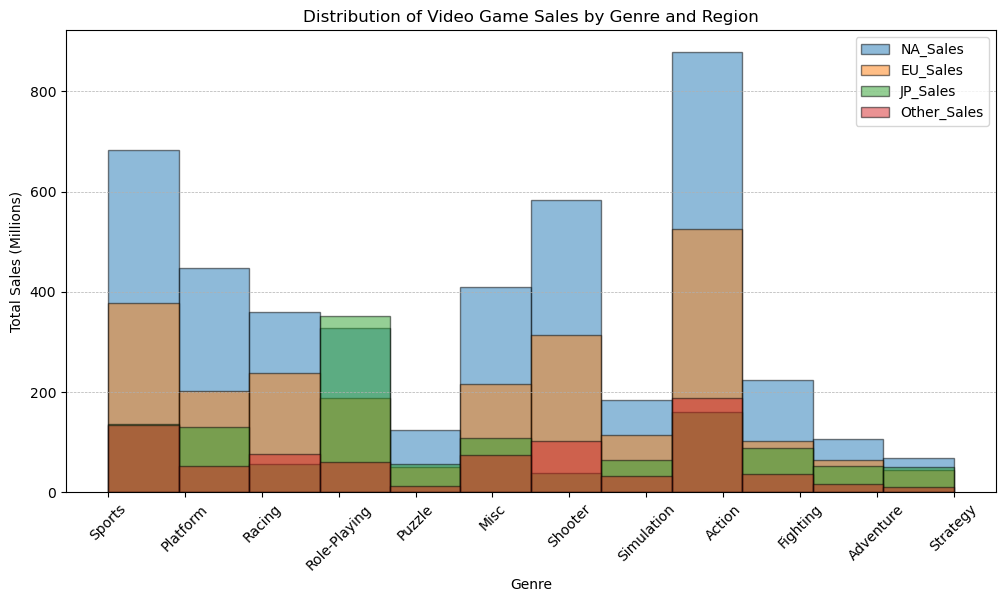

In [24]:
#define regions
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

#plot
plt.figure(figsize=(12, 6))

#loop through each region and plot a histogram
for region in regions:
    plt.hist(df['Genre'], weights=df[region], alpha=0.5, label=region, bins=len(df['Genre'].unique()), edgecolor='black')

#formatting
plt.title("Distribution of Video Game Sales by Genre and Region")
plt.xlabel("Genre")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle="--", linewidth=0.5)

#show plot
plt.show()


In [26]:
#number of games with 0 sales in Japan
zero_jp_sales = df[df['JP_Sales'] == 0]
print(f"Number of games with 0 sales in Japan: {zero_jp_sales.shape[0]}")

#compare with games that sold in Japan
non_zero_jp_sales = df[df['JP_Sales'] > 0]

#analyze genre impact
jp_genre_distribution = zero_jp_sales['Genre'].value_counts(normalize=True) * 100
print("Percentage of genres that did not sell in Japan:\n", jp_genre_distribution)


Number of games with 0 sales in Japan: 10455
Percentage of genres that did not sell in Japan:
 Genre
Action          20.564323
Sports          16.700143
Misc            11.496891
Racing           9.736968
Shooter          8.914395
Platform         5.834529
Simulation       5.710187
Adventure        5.203252
Role-Playing     4.170253
Puzzle           4.074605
Strategy         3.931133
Fighting         3.663319
Name: proportion, dtype: float64


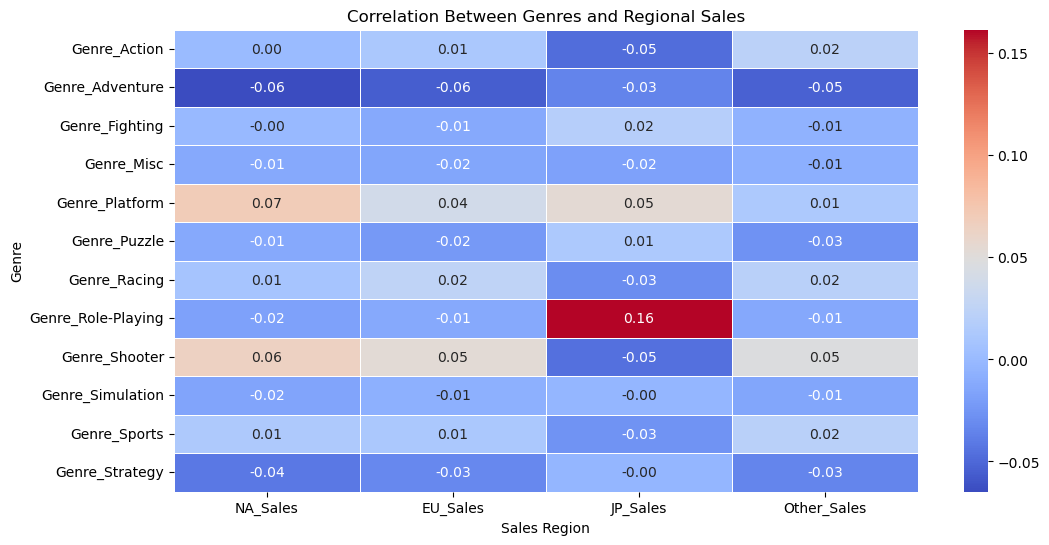

In [28]:
#one-hot encode the Genre column
df_encoded = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

#select only regional sales and genre columns for correlation analysis
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
genre_columns = [col for col in df_encoded.columns if 'Genre_' in col]

#correlation matrix between genres and regional sales
correlation_matrix = df_encoded[genre_columns + sales_columns].corr()

#extract only the correlation of genres with regional sales
correlation_genre_sales = correlation_matrix.loc[genre_columns, sales_columns]

#plot heatmap to visualize correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_genre_sales, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

#format
plt.title("Correlation Between Genres and Regional Sales")
plt.xlabel("Sales Region")
plt.ylabel("Genre")
plt.show()


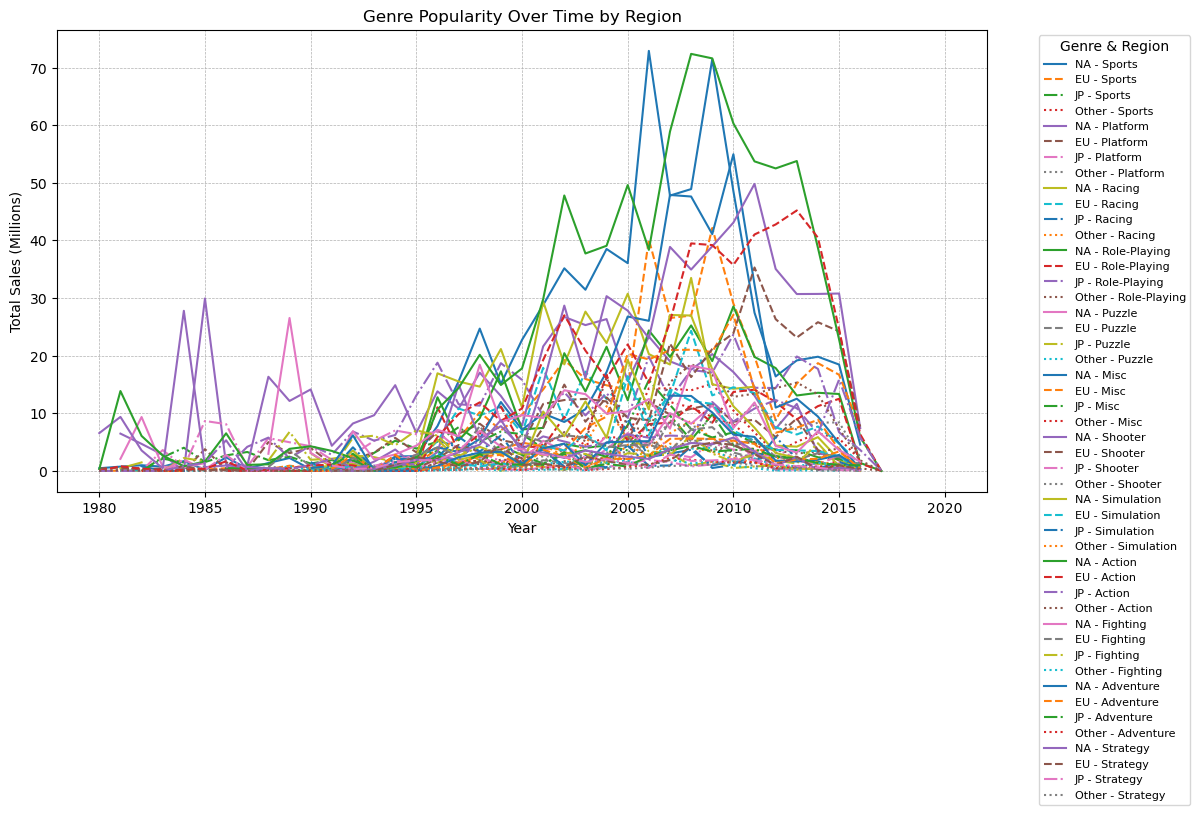

In [30]:
#GENRE POP OVER TIME
genre_region_trends = df.groupby(['Year', 'Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().unstack()

#plot sales trends for all genres by region
plt.figure(figsize=(12, 6))

#get all unique genres
all_genres = df['Genre'].unique()

#plot each genre separately for each region
for genre in all_genres:
    plt.plot(genre_region_trends.index, genre_region_trends[('NA_Sales', genre)], label=f'NA - {genre}', linestyle='-')
    plt.plot(genre_region_trends.index, genre_region_trends[('EU_Sales', genre)], label=f'EU - {genre}', linestyle='--')
    plt.plot(genre_region_trends.index, genre_region_trends[('JP_Sales', genre)], label=f'JP - {genre}', linestyle='-.')
    plt.plot(genre_region_trends.index, genre_region_trends[('Other_Sales', genre)], label=f'Other - {genre}', linestyle=':')

#formatting
plt.title("Genre Popularity Over Time by Region")
plt.xlabel("Year")
plt.ylabel("Total Sales (Millions)")
plt.legend(title="Genre & Region", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, linestyle="--", linewidth=0.5)

# Show plot
plt.show()

<Figure size 1200x600 with 0 Axes>

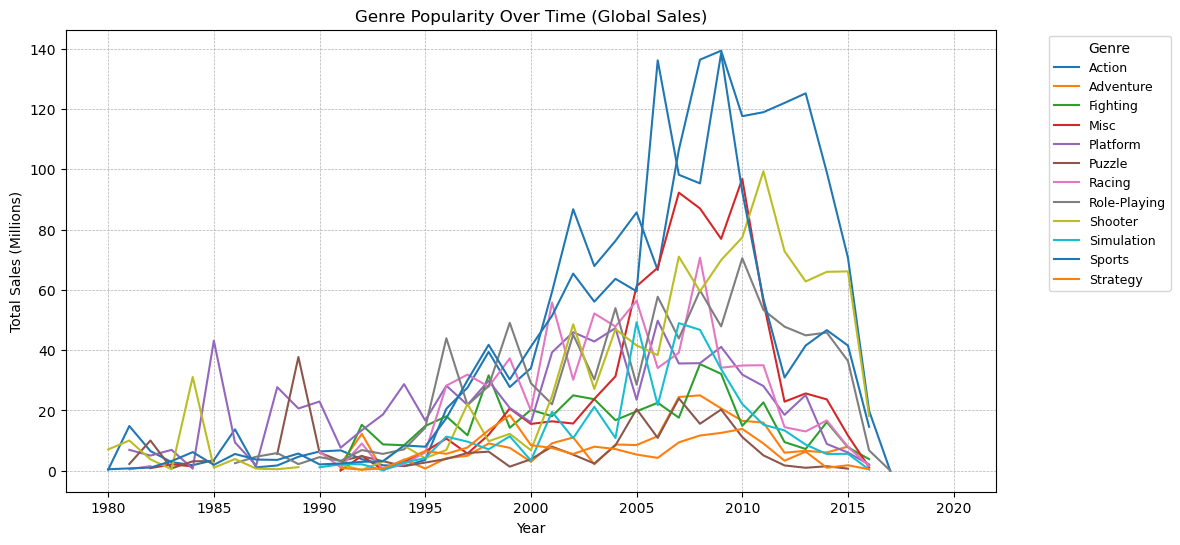

In [32]:
#GENRE POP OVER TIME
genre_trends = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()

#plot sales trends for all genres
plt.figure(figsize=(12, 6))
genre_trends.plot(kind='line', figsize=(12,6))

#formatting
plt.title("Genre Popularity Over Time (Global Sales)")
plt.xlabel("Year")
plt.ylabel("Total Sales (Millions)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, linestyle="--", linewidth=0.5)

#show plot
plt.show()